In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier


In [5]:
df = pd.read_csv('diagnosed_cbc_data_v4.csv')


In [6]:
df.head(10)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia
5,6.6,27.3,65.4,1.8,4.3,3.96,8.8,29.7,75.2,22.2,79.6,207.0,11.5,0.18,Other microcytic anemia
6,16.7,19.1,68.2,3.2,11.4,5.15,14.2,44.8,87.1,27.5,31.6,151.0,12.8,0.14,Leukemia
7,9.3,27.4,64.0,2.6,5.9,4.39,12.0,37.9,86.4,27.3,31.6,194.0,15.9,0.19,Normocytic hypochromic anemia
8,5.2,19.7,72.4,1.0,3.8,4.85,13.2,41.0,84.7,27.2,32.1,181.0,10.0,0.15,Healthy
9,10.5,12.4,79.0,1.3,8.3,4.57,12.4,38.9,85.3,27.1,31.8,164.0,11.3,0.14,Normocytic hypochromic anemia


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WBC,1281.0,7.862717,3.564466,0.80,6.00000,7.400000,8.68000,45.7
LYMp,1281.0,25.845000,7.038728,6.20,25.84500,25.845000,25.84500,91.4
NEUTp,1281.0,77.511000,147.746273,0.70,71.10000,77.511000,77.51100,5317.0
LYMn,1281.0,1.880760,1.335689,0.20,1.88076,1.880760,1.88076,41.8
NEUTn,1281.0,5.140940,2.872294,0.50,5.10000,5.140940,5.14094,79.0
RBC,1281.0,4.708267,2.817200,1.36,4.19000,4.600000,5.10000,90.8
HGB,1281.0,12.184551,3.812897,-10.00,10.80000,12.300000,13.50000,87.1
HCT,1281.0,46.152600,104.886100,2.00,39.20000,46.152600,46.15260,3715.0
MCV,1281.0,85.793919,27.177663,-79.30,81.20000,86.600000,90.20000,990.0
MCH,1281.0,32.084840,111.170756,10.90,25.50000,27.800000,29.60000,3117.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [9]:
df.isnull().sum(axis=0)

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

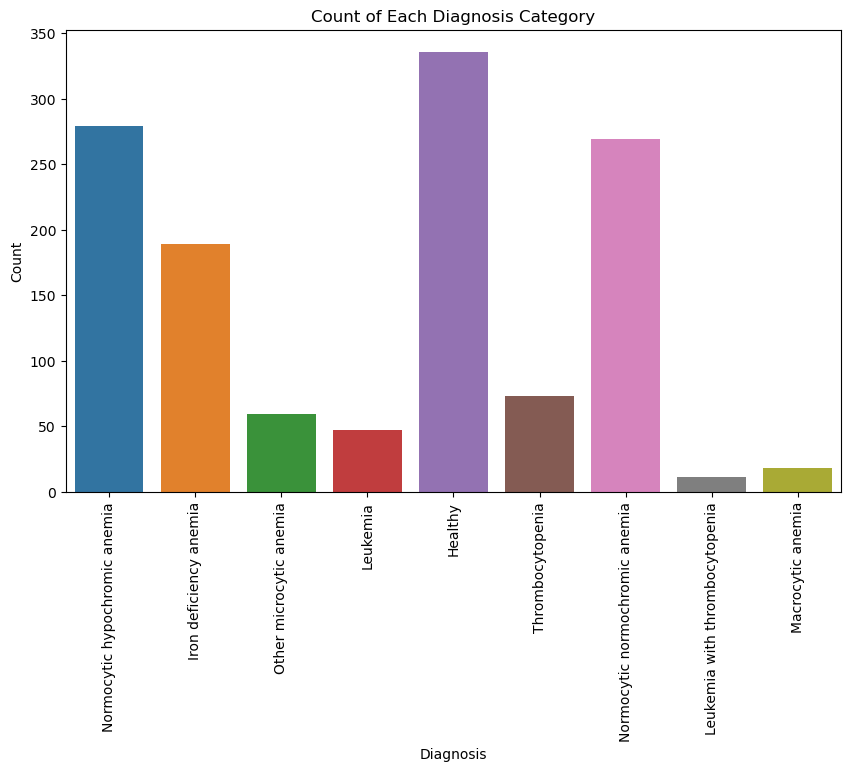

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnosis', data=df)
plt.title('Count of Each Diagnosis Category')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

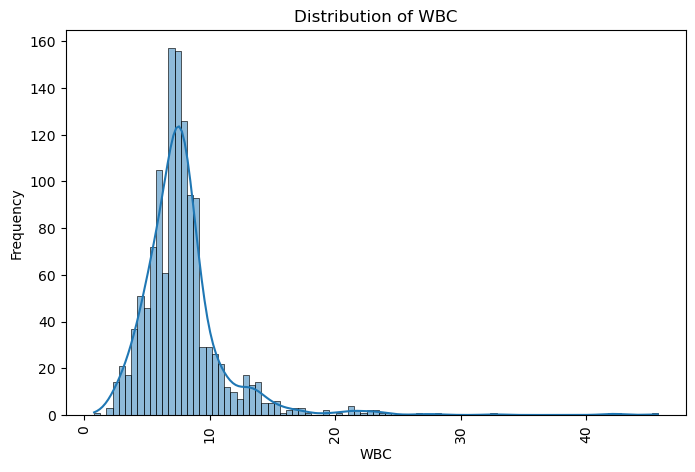

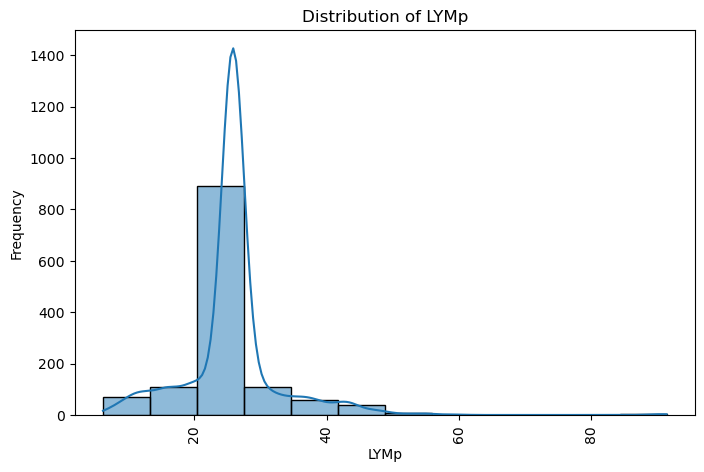

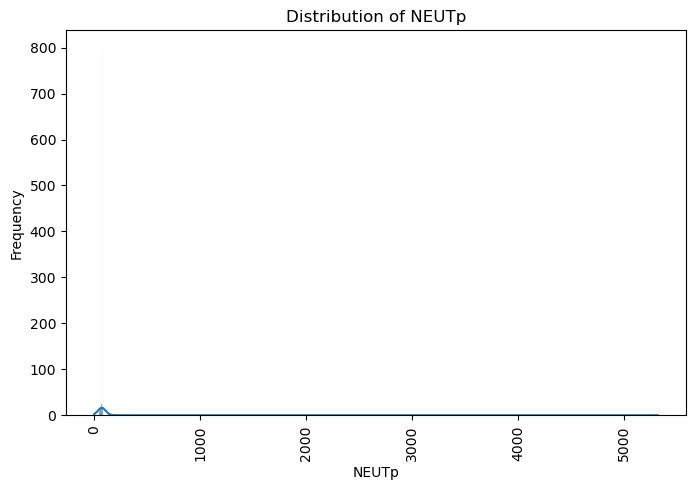

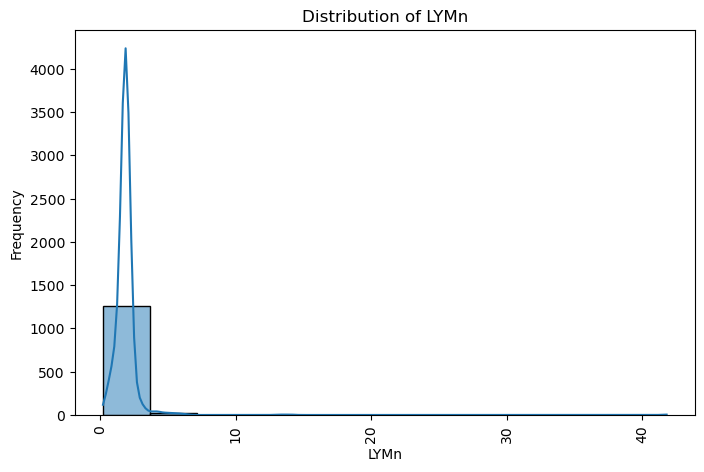

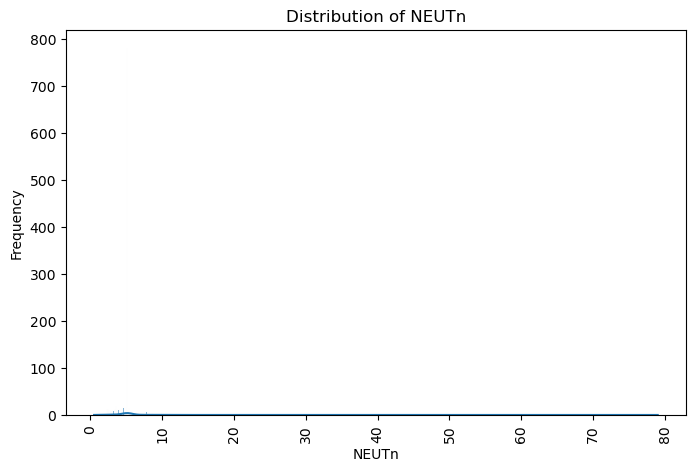

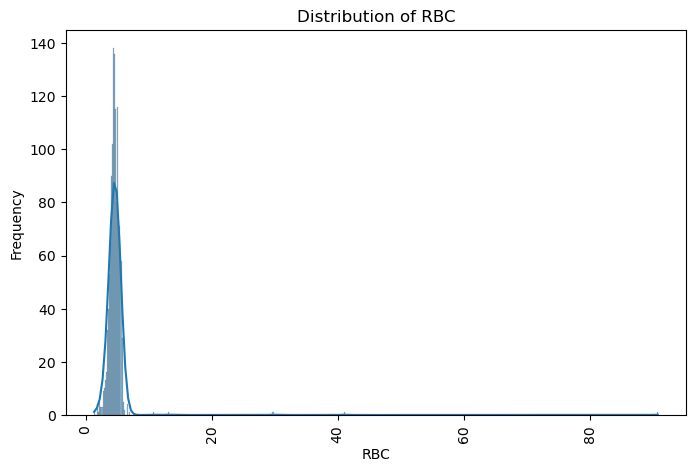

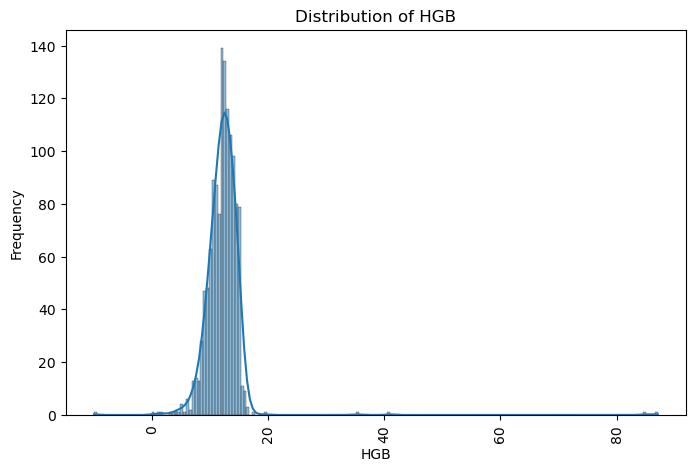

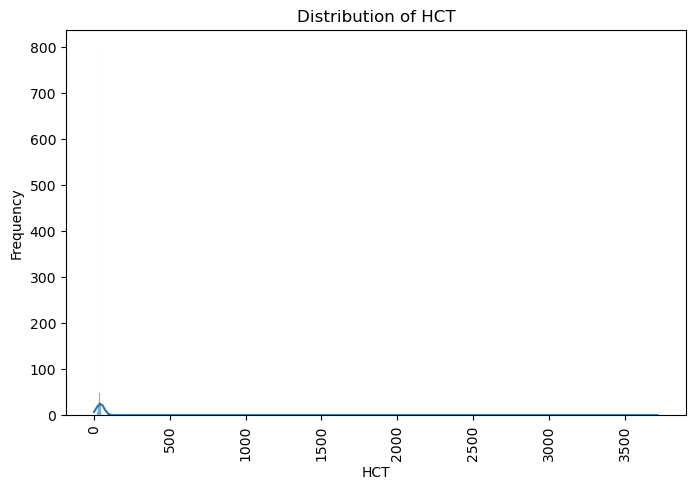

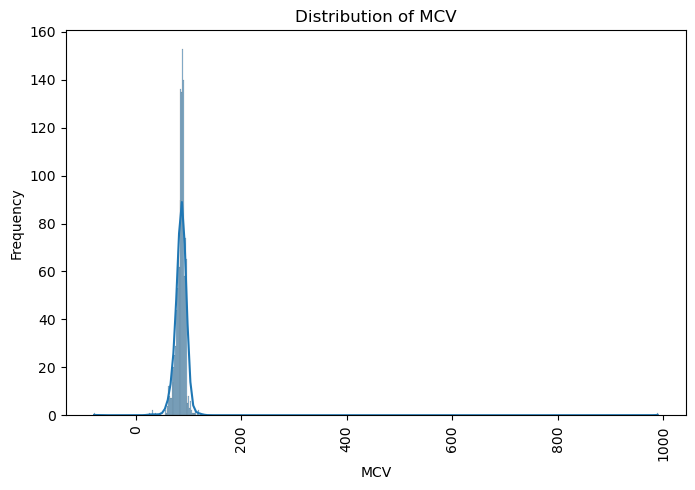

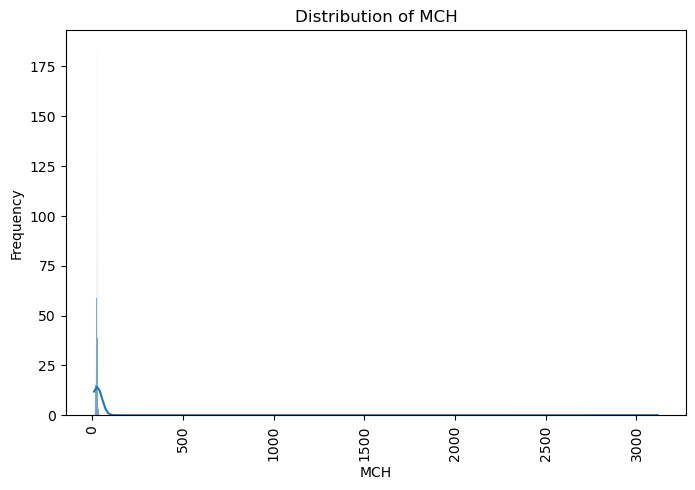

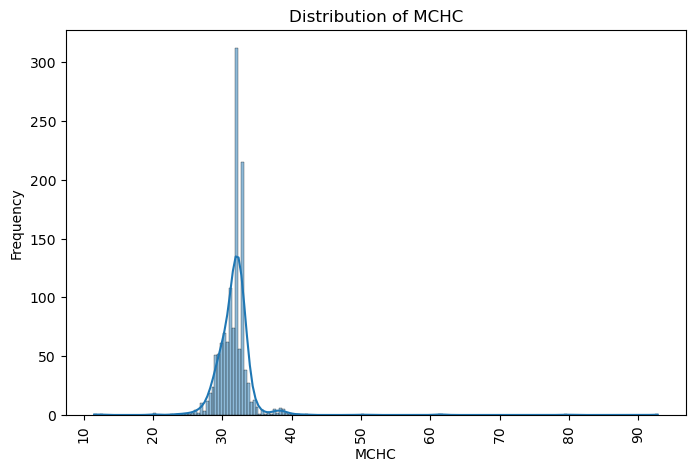

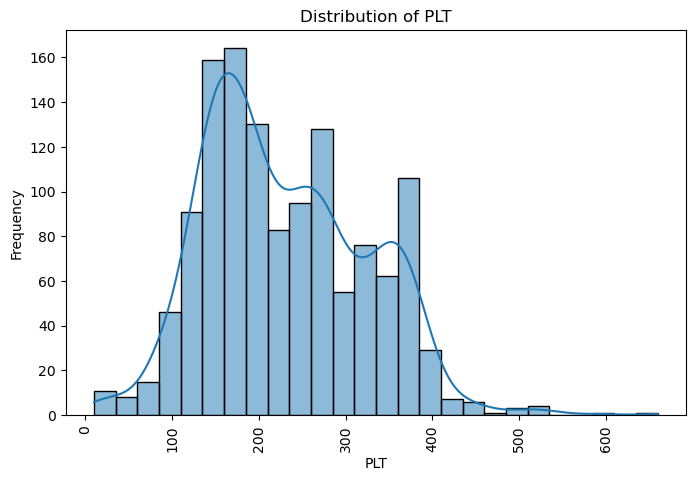

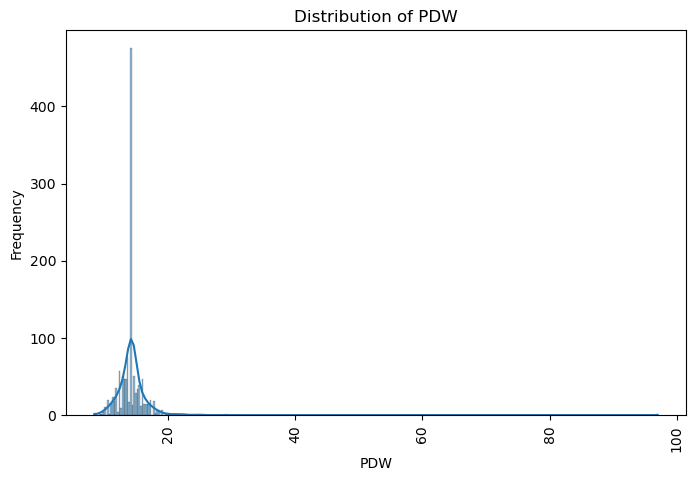

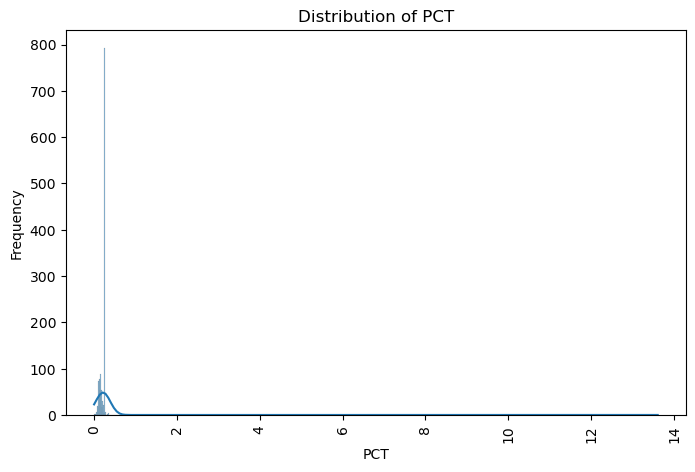

In [11]:
columns = ['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']
for column in columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True)  
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

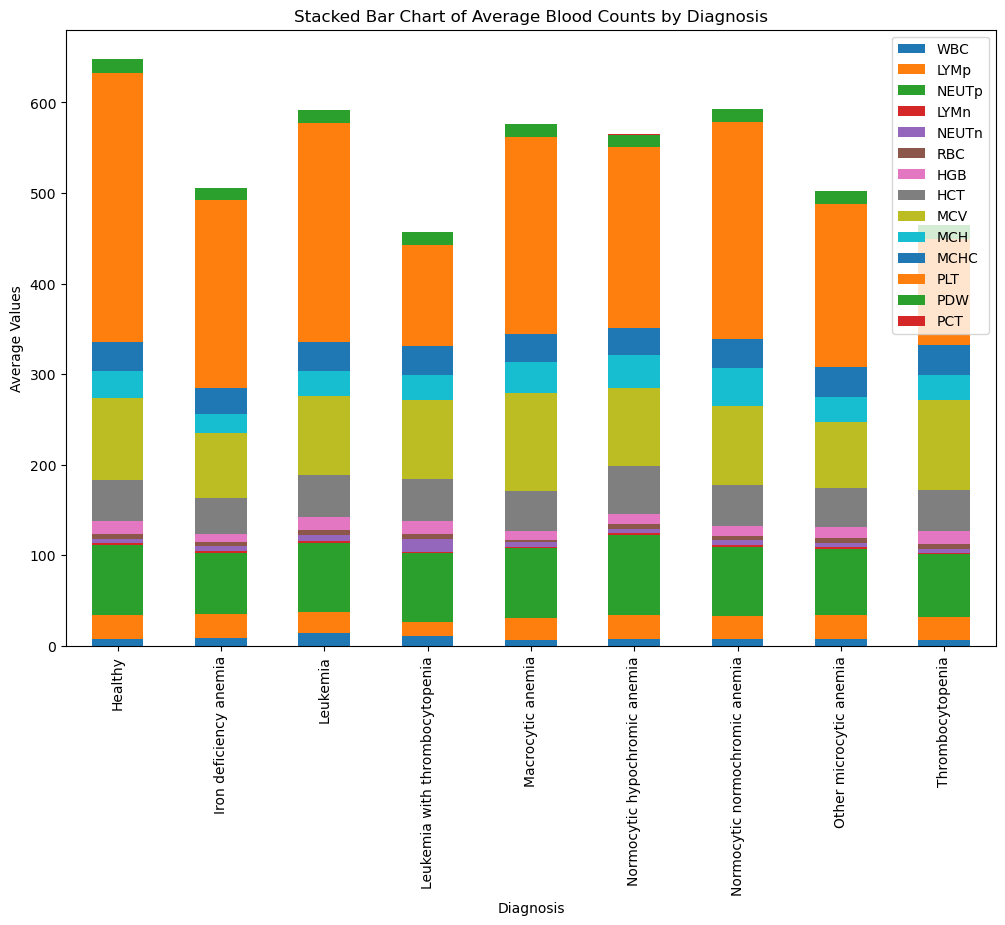

In [12]:
df_grouped = df.groupby('Diagnosis').mean()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Average Blood Counts by Diagnosis')
plt.ylabel('Average Values')
plt.show()

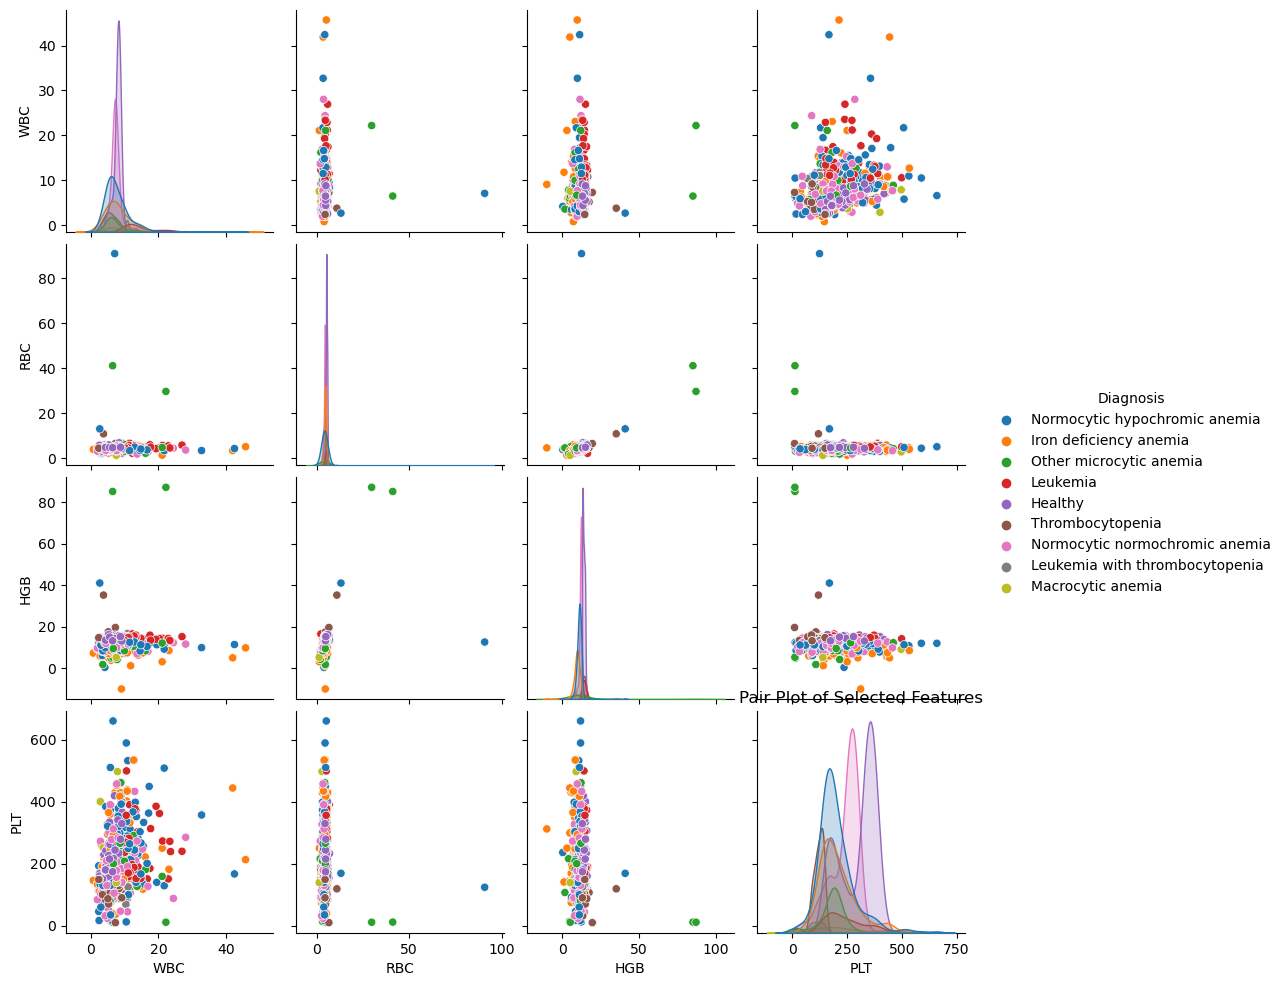

In [13]:
sns.pairplot(df[['WBC', 'RBC', 'HGB', 'PLT', 'Diagnosis']], hue='Diagnosis')
plt.title('Pair Plot of Selected Features')
plt.show()

In [14]:
x = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =43)

In [16]:
table_name = "df_test"
x_test.to_csv(f"{table_name}.csv", index=False)
print(f"Pandas test DataFrame saved to CSV: {table_name}.csv")

Pandas test DataFrame saved to CSV: df_test.csv


In [17]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbdt',GradientBoostingClassifier())
]

In [22]:
clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [23]:
clf.fit(x_train,y_train)


StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [24]:
y_pred = clf.predict(x_test)


In [25]:
accuracy_score(y_test,y_pred)


0.980544747081712

In [27]:
ndf = pd.read_csv("df_test.csv")


In [28]:
ndf['prediction'] = y_pred


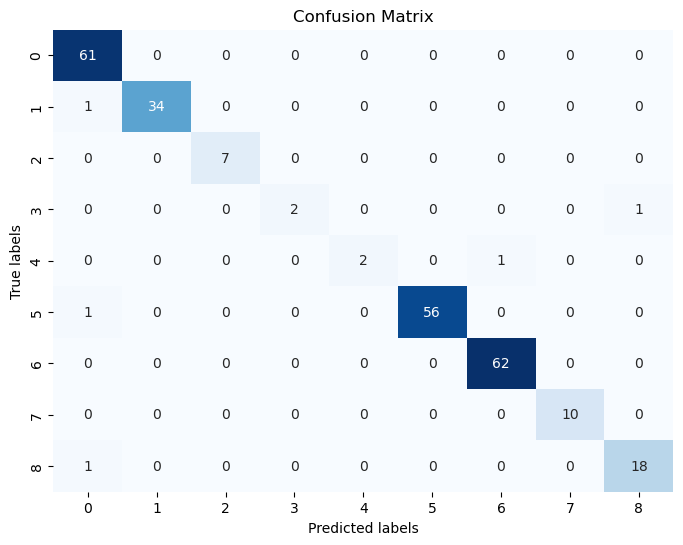

In [29]:
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [30]:
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
                                precision    recall  f1-score   support

                       Healthy       0.95      1.00      0.98        61
        Iron deficiency anemia       1.00      0.97      0.99        35
                      Leukemia       1.00      1.00      1.00         7
Leukemia with thrombocytopenia       1.00      0.67      0.80         3
             Macrocytic anemia       1.00      0.67      0.80         3
 Normocytic hypochromic anemia       1.00      0.98      0.99        57
Normocytic normochromic anemia       0.98      1.00      0.99        62
       Other microcytic anemia       1.00      1.00      1.00        10
              Thrombocytopenia       0.95      0.95      0.95        19

                      accuracy                           0.98       257
                     macro avg       0.99      0.91      0.94       257
                  weighted avg       0.98      0.98      0.98       257



In [31]:
ndf.head()


,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,prediction
0,8.30,25.845,77.511,1.88076,5.14094,5.20,14.3,46.1526,91.0,30.0,33.0,360.0,13.800000,0.26028,Healthy
1,5.60,25.845,77.511,1.88076,5.14094,4.32,15.2,46.1526,100.0,35.2,35.2,334.0,14.312512,0.26028,Healthy
2,10.22,25.845,77.511,1.88076,5.14094,4.61,11.9,46.1526,88.3,25.8,29.2,259.0,14.312512,0.26028,Normocytic hypochromic anemia
3,8.70,25.845,77.511,1.88076,5.14094,5.70,14.5,46.1526,95.0,31.0,33.0,380.0,13.900000,0.26028,Healthy
4,10.00,25.845,77.511,1.88076,5.14094,4.63,13.3,46.1526,88.9,32.5,32.5,271.0,14.312512,0.26028,Healthy


In [32]:
table_name = "Prediction"
ndf.to_csv(f"{table_name}.csv", index=False)
print(f"Pandas DataFrame with predictions saved to CSV file: {table_name}.csv")

Pandas DataFrame with predictions saved to CSV file: Prediction.csv
